In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# checking the size of the dataset
print(df.shape)

(9994, 13)


In [5]:
# dropping duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [7]:
# checking null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# EDA - Exploratory Data Analysis

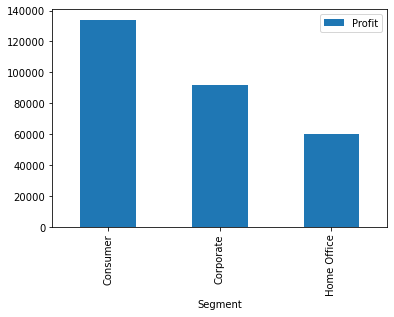

In [8]:
# Total Profit by Each Segment
df[['Profit','Segment']].groupby('Segment').sum().plot(kind ='bar', y = 'Profit')

# Insight 1
## From the above graph, we can see that maximum proift has been generated by Consumer Segment followed by Corporate and Home office

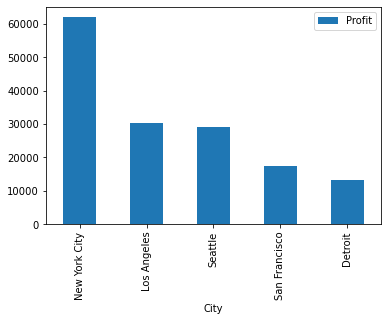

In [9]:
# Top 5 cities with Maximum profit
df[['Profit','City']].groupby('City').sum().sort_values(by= 'Profit',ascending= False).head().plot(kind = 'bar',)

#### insight 2
from the above graph we can see that Newyork city has generated maximum profit followed by LA, Seattle, SF and Detroit

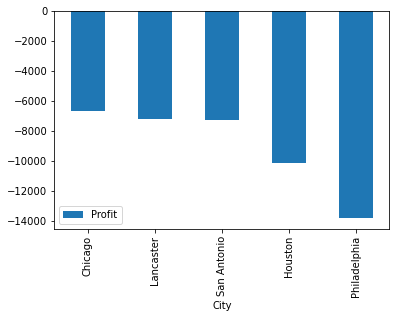

In [10]:
df[['Profit','City']].groupby('City').sum().sort_values(by='Profit', ascending = False).tail().plot(kind= 'bar')

# Insight 3
## Philiadephia with the maximum loss followed by Houston, SA, Lancaster, Chicago

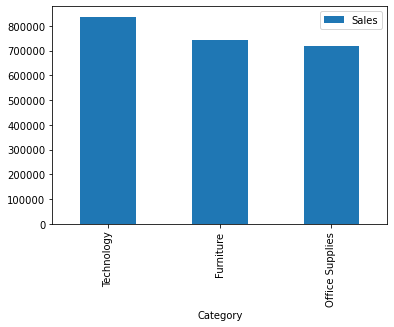

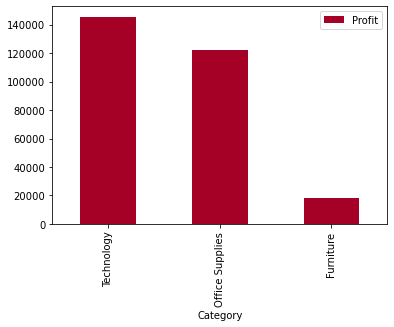

In [11]:
df[['Sales','Category']].groupby('Category').sum().sort_values(by='Sales', ascending = False).plot(kind = 'bar')

df[['Profit','Category']].groupby('Category').sum().sort_values(by= 'Profit',ascending= False).plot(kind = 'bar', colormap = 'RdYlBu')


# from the above graphs, we can see that:
## 1. Furniture being the second most sold category, has the least profit.

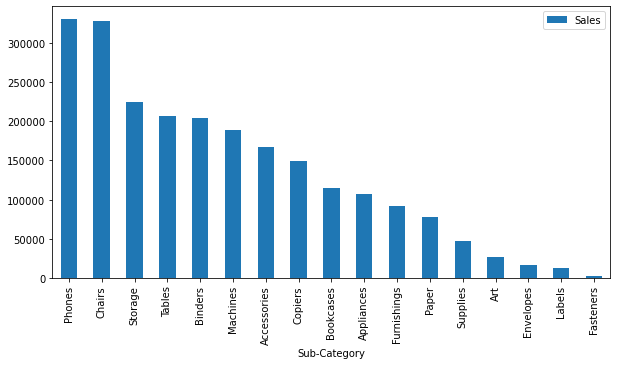

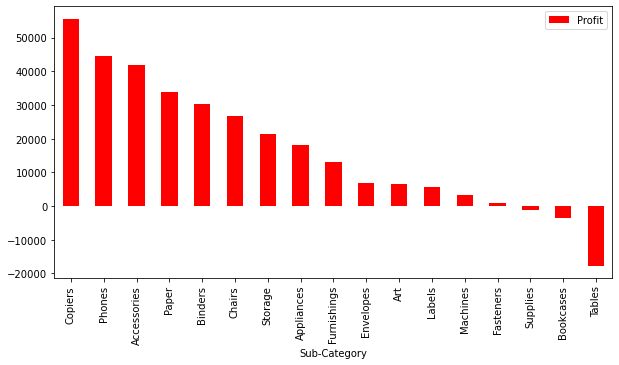

In [12]:
fig, ax1 = plt.subplots(figsize=(10, 5))
df[['Sub-Category', 'Sales']].groupby('Sub-Category').sum().sort_values(by= 'Sales', ascending = False).plot(kind = 'bar', legend = True, ax = ax1)

fig, ax2 = plt.subplots(figsize=(10, 5))
df[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().sort_values(by= 'Profit', ascending = False).plot(kind = 'bar',colormap = 'flag',ax = ax2)

# from the above graph we can see that :

## the tables being the 4th top selling items, has maximum loss.

## Binders are the top sold sub-category

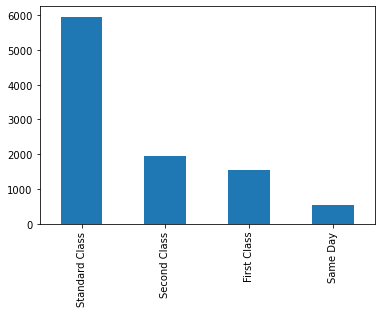

In [13]:
df['Ship Mode'].value_counts().plot(kind = 'bar')

In [14]:
# Minimum order and Maximum order
# min_order = df[df['Sales']==df['Sales'].min()]
# min_order = df[df['Sales']==df['Sales'].max()]
min_order = df[df['Sales']<10]

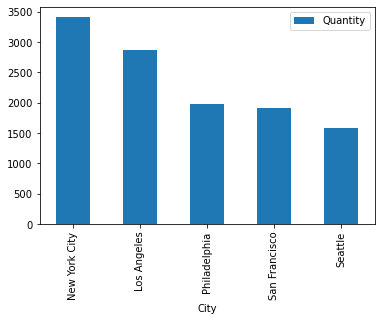

In [15]:
min_order_city = df[['City', 'Quantity']].groupby('City').sum().sort_values(by='Quantity', ascending = False).head().plot(kind = 'bar')

# Insight
## 1. Top 5 maximum order placed from cities

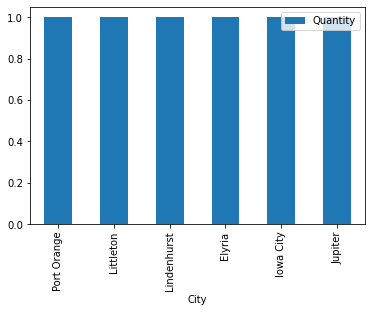

In [16]:
min_order_city = df[['City', 'Quantity']].groupby('City').sum().sort_values(by='Quantity').head(6).plot(kind = 'bar')

### Insight:
#### 1. Above 6 cities has minimum number of order placed

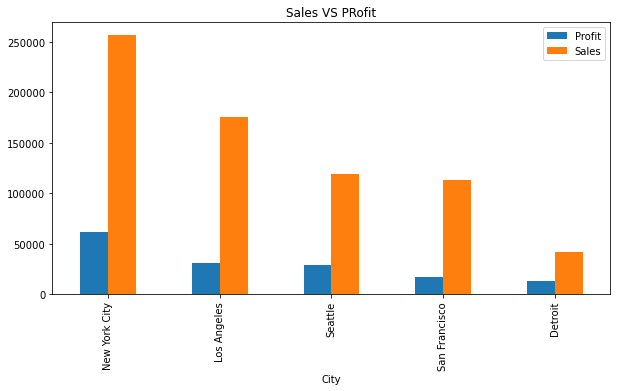

In [17]:
import seaborn as sns
fig, ax3 = plt.subplots(figsize=(10, 5))
top_5_city = df[['Profit','City','Sales']].groupby('City').sum().sort_values(by= 'Profit',ascending= False).head().plot(kind = 'bar', title= 'Sales VS PRofit',ax = ax3)


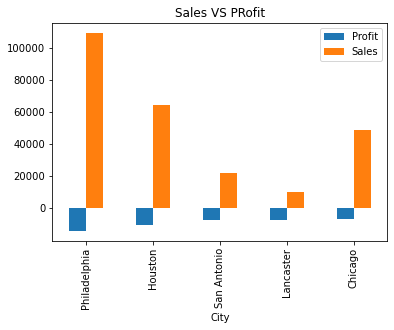

In [18]:
df[['Profit','City','Sales']].groupby('City').sum().sort_values(by= 'Profit',ascending= True).head().plot(kind = 'bar', title= 'Sales VS PRofit')


# Insight
## Cities with maximum loss with a good number of sales

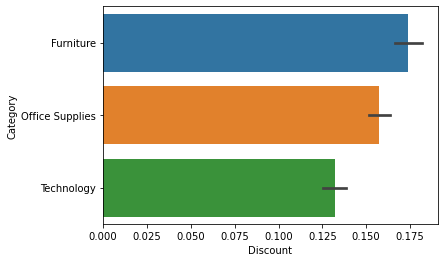

In [19]:
sns.barplot(x = df['Discount'], y = df['Category'])

# Insight
##### with the above graph , we can see that more the discount we provide,less will the profit ( Furniture has minimum profit)